In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [14]:
train_dir = 'DATASET/TRAIN' #directory with training images
test_dir = 'DATASET/TEST' #directory with testing images

In [15]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [16]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (75,75),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (75,75),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(75, 75, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [18]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50  
batch_size = 16

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 batch_normalization_7 (Batc  (None, 37, 37, 128)     

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# path = "../model2/weights-{epoch:02d}.hdf5"
# checkpoint = ModelCheckpoint(path, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

# callback = [checkpoint]

# Add this cell after model compilation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Create checkpoint callback
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [22]:
# history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator,callbacks = callback)
# history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)
# Replace your training cell with this
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/50
55/55 [==============================] - ETA: 0s - loss: 2.5231 - accuracy: 0.2587
Epoch 1: val_accuracy improved from -inf to 0.17391, saving model to best_model.h5
55/55 [==============================] - 40s 702ms/step - loss: 2.5231 - accuracy: 0.2587 - val_loss: 2.1408 - val_accuracy: 0.1739
Epoch 2/50
55/55 [==============================] - ETA: 0s - loss: 2.2000 - accuracy: 0.2991
Epoch 2: val_accuracy improved from 0.17391 to 0.27174, saving model to best_model.h5
55/55 [==============================] - 23s 411ms/step - loss: 2.2000 - accuracy: 0.2991 - val_loss: 1.8485 - val_accuracy: 0.2717
Epoch 3/50
55/55 [==============================] - ETA: 0s - loss: 1.9814 - accuracy: 0.3533
Epoch 3: val_accuracy did not improve from 0.27174
55/55 [==============================] - 23s 419ms/step - loss: 1.9814 - accuracy: 0.3533 - val_loss: 2.1962 - val_accuracy: 0.2500
Epoch 4/50
55/55 [==============================] - ETA: 0s - loss: 1.8708 - accuracy: 0.3799
Epoch 4:

C:\Users\EVA BALABANTARAY\AppData\Local\Temp\ipykernel_10784\3661583657.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


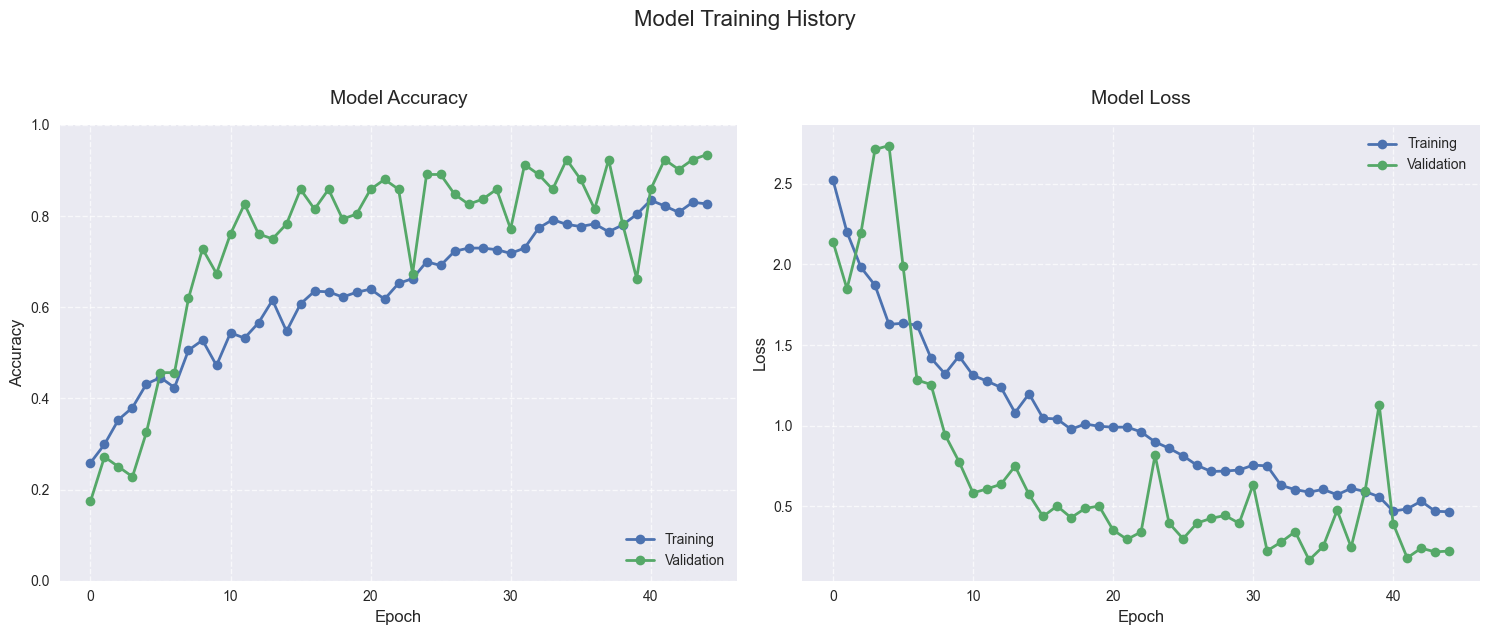


Final Training Metrics:
Training Accuracy: 0.8268
Validation Accuracy: 0.9348
Training Loss: 0.4672
Validation Loss: 0.2238


In [23]:
# fig , ax = plt.subplots(1,2)
# train_acc = history.history['accuracy']
# train_loss = history.history['loss']
# fig.set_size_inches(12,4)

# ax[0].plot(history.history['accuracy'])
# ax[0].plot(history.history['val_accuracy'])
# ax[0].set_title('Training Accuracy vs Validation Accuracy')
# ax[0].set_ylabel('Accuracy')
# ax[0].set_xlabel('Epoch')
# ax[0].legend(['Train', 'Validation'], loc='upper left')

# ax[1].plot(history.history['loss'])
# ax[1].plot(history.history['val_loss'])
# ax[1].set_title('Training Loss vs Validation Loss')
# ax[1].set_ylabel('Loss')
# ax[1].set_xlabel('Epoch')
# ax[1].legend(['Train', 'Validation'], loc='upper left')

# plt.show()

# In the plotting cell (last cell with graphs)
def plot_training_metrics(history):
    # Set figure style
    plt.style.use('seaborn')
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Model Training History', fontsize=16, y=1.05)
    
    # Plot Accuracy
    ax1.plot(history.history['accuracy'], marker='o', linestyle='-', linewidth=2, label='Training')
    ax1.plot(history.history['val_accuracy'], marker='o', linestyle='-', linewidth=2, label='Validation')
    ax1.set_title('Model Accuracy', fontsize=14, pad=15)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(loc='lower right', fontsize=10)
    ax1.set_ylim([0, 1])
    
    # Plot Loss
    ax2.plot(history.history['loss'], marker='o', linestyle='-', linewidth=2, label='Training')
    ax2.plot(history.history['val_loss'], marker='o', linestyle='-', linewidth=2, label='Validation')
    ax2.set_title('Model Loss', fontsize=14, pad=15)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(loc='upper right', fontsize=10)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print final metrics
    print('\nFinal Training Metrics:')
    print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Training Loss: {history.history['loss'][-1]:.4f}")
    print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Call the function with your training history
plot_training_metrics(history)

In [24]:
# Add this cell before training
print("Training Dataset:")
for class_name in train_generator.class_indices:
    n_samples = len(os.listdir(os.path.join(train_dir, class_name)))
    print(f"{class_name}: {n_samples} images")

print("\nValidation Dataset:")
for class_name in validation_generator.class_indices:
    n_samples = len(os.listdir(os.path.join(test_dir, class_name)))
    print(f"{class_name}: {n_samples} images")

Training Dataset:
downdog: 223 images
goddess: 180 images
plank: 266 images
tree: 160 images
warrior2: 252 images

Validation Dataset:
downdog: 97 images
goddess: 80 images
plank: 115 images
tree: 69 images
warrior2: 109 images


c:\Users\EVA BALABANTARAY\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


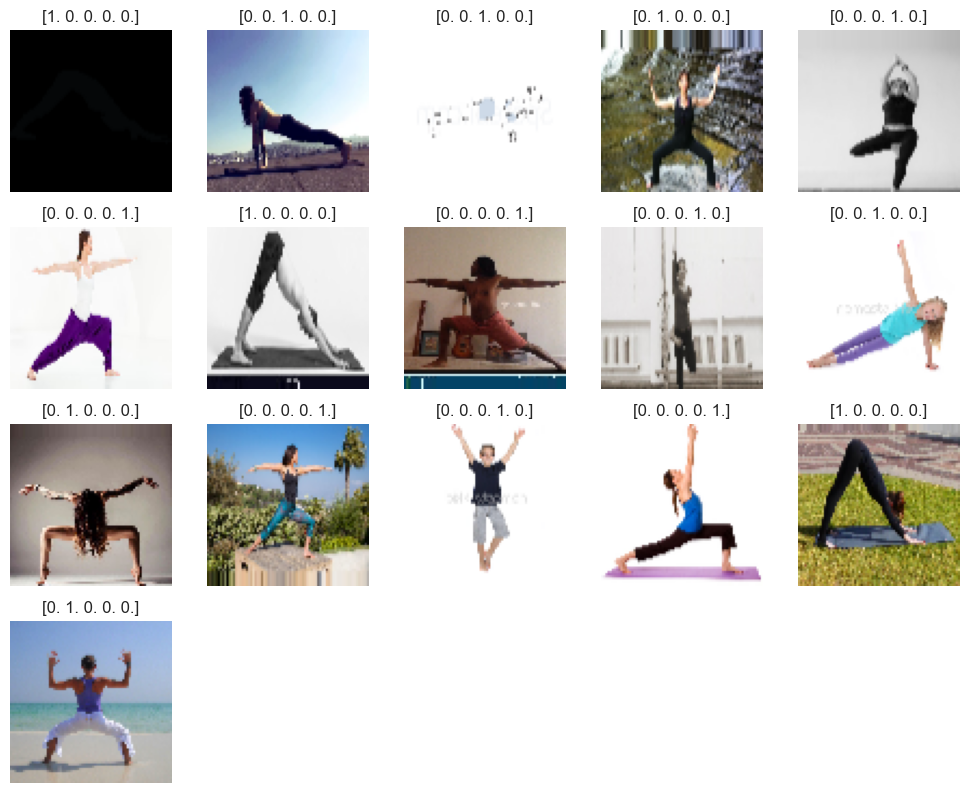

In [25]:
# Add this cell to verify images
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(min(25, len(image_batch))):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        plt.title(label_batch[n])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of training images
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)